In [7]:
import pandas as pd
import numpy as np
import torch
import os
import sys
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.animation as animation
import mpl_toolkits.axes_grid1
import matplotlib.widgets

%load_ext autoreload
%autoreload 2

from em_discrete.tasks.binary_linearVB import BinaryLinearVBTask
from em_discrete.utils.result_handling import parse_directory
from em_discrete.models.rnn_model import RNNModel

from emt_tools.utils import spectral_comparison
from emt_tools.models.linearModel import LinearModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Train rcopy task

In [2]:
EXPERIMENT_PATH = os.path.join(sys.environ["EXPERIMENT_OUTPUT_DIR"], "6_1_all_linear_v4_rnn")
BATCH_SIZE = 64

## Load the result_dict from the learned models (if saved before, run the next section)

In [3]:
result_df = parse_directory(os.path.join(EXPERIMENT_PATH, "binary_linearVB"))

In [4]:
result_df[:5]

,batch_size,curriculum,curriculum_threshold,hidden_dim,input_dim,l2_penalty,learning_rate,seed,seq_length,task_id,path
0,64,True,0.98,150,8,0.000,0.001,1,8,"(9241421688590303745, 0, 0)",/home/akaruvally_umass_edu/pi_hava_umass_edu/a...
1,64,True,0.90,120,8,0.001,0.001,1,8,"(9241421688590303745, 0, 0)",/home/akaruvally_umass_edu/pi_hava_umass_edu/a...
2,64,True,0.90,120,8,0.001,0.001,2,8,"(9241421688590303745, 0, 0)",/home/akaruvally_umass_edu/pi_hava_umass_edu/a...
3,64,True,0.98,120,8,0.001,0.001,2,8,"(9241421688590303745, 0, 0)",/home/akaruvally_umass_edu/pi_hava_umass_edu/a...
4,64,True,0.98,120,8,0.001,0.001,1,8,"(9241421688590303745, 0, 0)",/home/akaruvally_umass_edu/pi_hava_umass_edu/a...


Evaluating model id: 0/96


/home/akaruvally_umass_edu/pi_hava_umass_edu/arjun/home/anaconda3/envs/func_mod_env/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:196: UserWarning: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
  rank_zero_warn(


0.9999453125000001
batch_size                                                             64
curriculum                                                           True
curriculum_threshold                                                 0.98
hidden_dim                                                            150
input_dim                                                               8
l2_penalty                                                            0.0
learning_rate                                                       0.001
seed                                                                    1
seq_length                                                              8
task_id                                       (9241421688590303745, 0, 0)
path                    /home/akaruvally_umass_edu/pi_hava_umass_edu/a...
Name: 0, dtype: object
(150, 64)
[63.  0.  0.  0.  0.  0.  0.  0.  0. 54.  0.  0.  0.  0.  0.  0.  0.  0.
 45.  0.  0.  0.  0.  0.  0.  0.  0. 36.  0.  0.  0.  0.  0. 

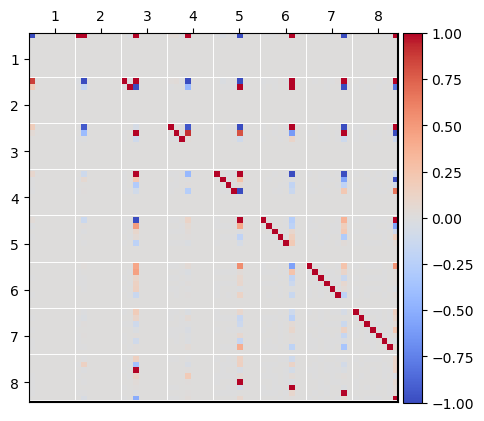

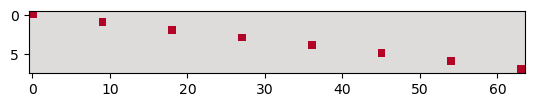

(200, 64, 8) (200, 64, 8)


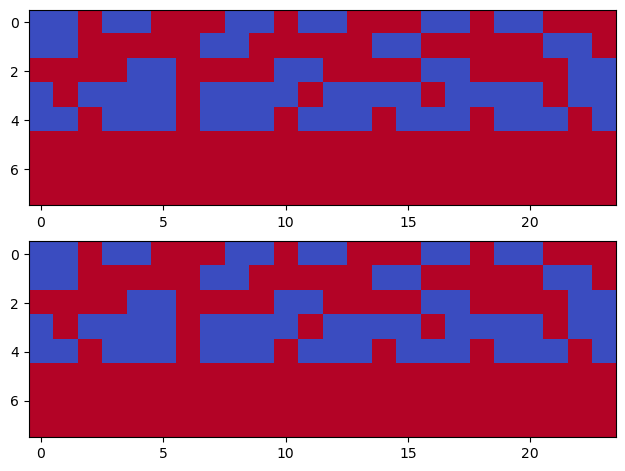

Evaluating model id: 1/96
Evaluating model id: 2/96
Evaluating model id: 3/96
Evaluating model id: 4/96
Evaluating model id: 5/96
Evaluating model id: 6/96
Evaluating model id: 7/96
Evaluating model id: 8/96
Evaluating model id: 9/96
Evaluating model id: 10/96
Evaluating model id: 11/96
0.999951171875
batch_size                                                             64
curriculum                                                           True
curriculum_threshold                                                  0.9
hidden_dim                                                             80
input_dim                                                               8
l2_penalty                                                            0.0
learning_rate                                                       0.001
seed                                                                    1
seq_length                                                              8
task_id                        

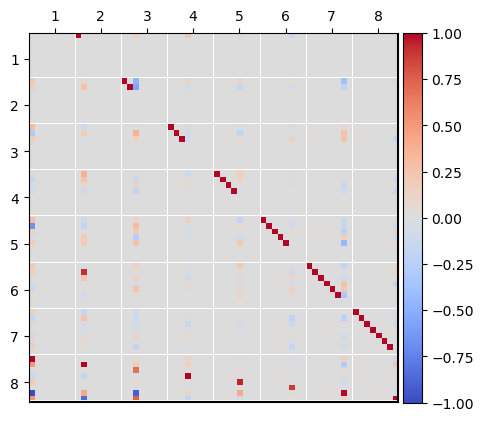

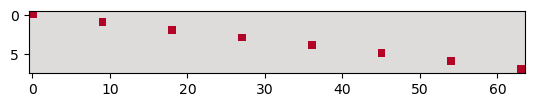

(200, 64, 8) (200, 64, 8)


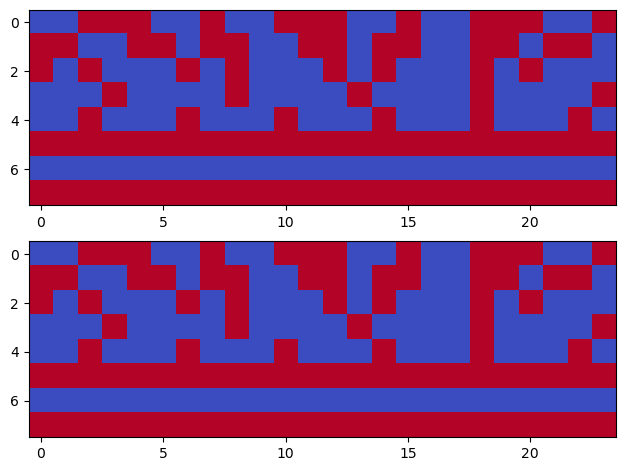

Evaluating model id: 12/96
1.0
batch_size                                                             64
curriculum                                                           True
curriculum_threshold                                                 0.98
hidden_dim                                                             80
input_dim                                                               8
l2_penalty                                                            0.0
learning_rate                                                       0.001
seed                                                                    1
seq_length                                                              8
task_id                                       (9241421688590303745, 0, 0)
path                    /home/akaruvally_umass_edu/pi_hava_umass_edu/a...
Name: 12, dtype: object
(80, 64)
[63.  0.  0.  0.  0.  0.  0.  0.  0. 54.  0.  0.  0.  0.  0.  0.  0.  0.
 45.  0.  0.  0.  0.  0.  0.  0.  0. 36.  0.  0. 

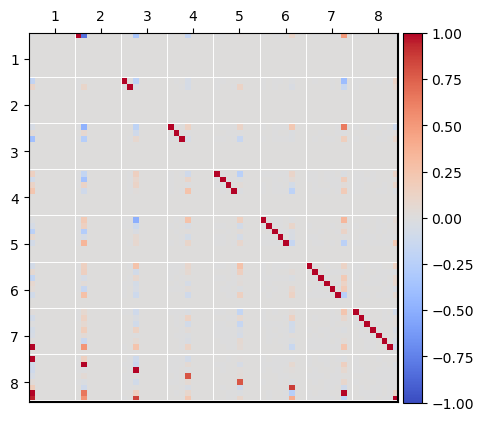

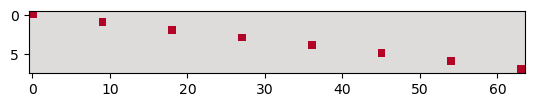

(200, 64, 8) (200, 64, 8)


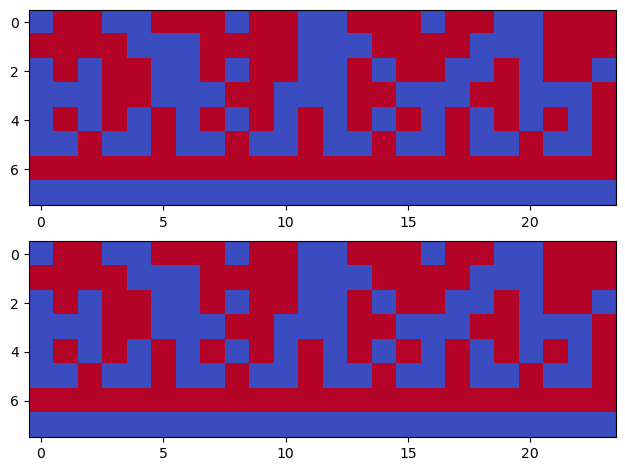

Evaluating model id: 13/96
Evaluating model id: 14/96
1.0
batch_size                                                             64
curriculum                                                           True
curriculum_threshold                                                 0.98
hidden_dim                                                             80
input_dim                                                               8
l2_penalty                                                          0.001
learning_rate                                                       0.001
seed                                                                    1
seq_length                                                              8
task_id                                       (9241421688590303745, 0, 0)
path                    /home/akaruvally_umass_edu/pi_hava_umass_edu/a...
Name: 14, dtype: object
(80, 64)
[63.  0.  0.  0.  0.  0.  0.  0.  0. 54.  0.  0.  0.  0.  0.  0.  0.  0.
 45.  0.  0.  0.  0.  

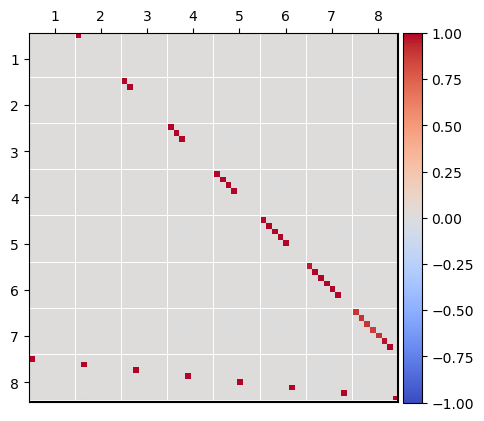

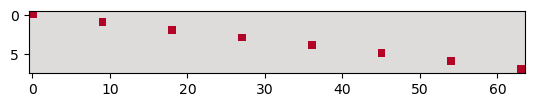

(200, 64, 8) (200, 64, 8)


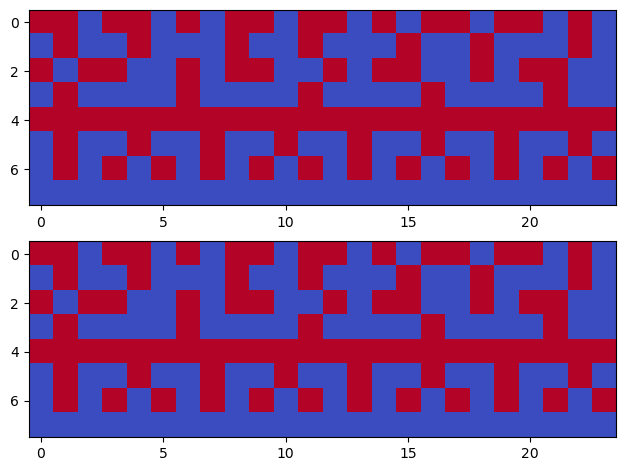

Evaluating model id: 15/96
Evaluating model id: 16/96
Evaluating model id: 17/96
Evaluating model id: 18/96
Evaluating model id: 19/96
0.9998544921875
batch_size                                                             64
curriculum                                                           True
curriculum_threshold                                                  0.9
hidden_dim                                                             64
input_dim                                                               8
l2_penalty                                                            0.0
learning_rate                                                       0.001
seed                                                                    1
seq_length                                                              8
task_id                                       (9241421688590303745, 0, 0)
path                    /home/akaruvally_umass_edu/pi_hava_umass_edu/a...
Name: 19, dtype: object
(64, 64)
[6

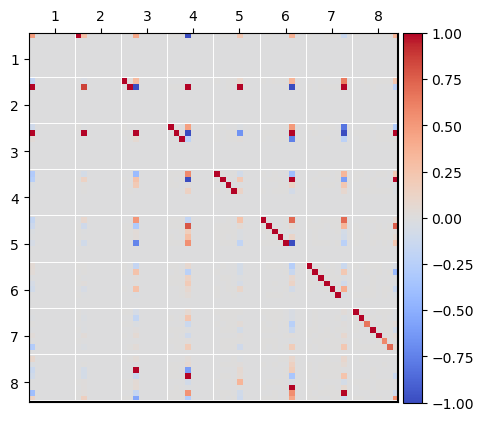

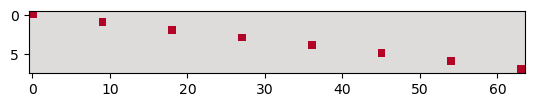

(200, 64, 8) (200, 64, 8)


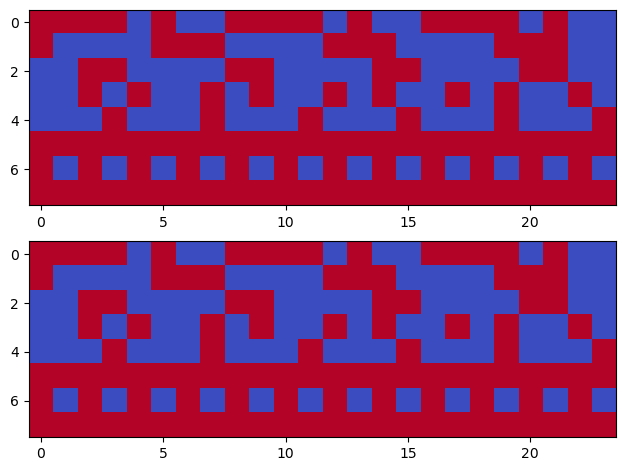

Evaluating model id: 20/96
Evaluating model id: 21/96
Evaluating model id: 22/96
Evaluating model id: 23/96
Evaluating model id: 24/96
Evaluating model id: 25/96
Evaluating model id: 26/96
Evaluating model id: 27/96
Evaluating model id: 28/96
Evaluating model id: 29/96
Evaluating model id: 30/96
Evaluating model id: 31/96
1.0
batch_size                                                             64
curriculum                                                           True
curriculum_threshold                                                 0.98
hidden_dim                                                            150
input_dim                                                               8
l2_penalty                                                          0.001
learning_rate                                                       0.001
seed                                                                    1
seq_length                                                              8
task_i

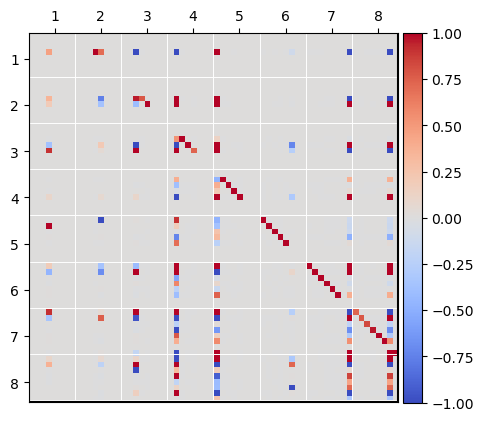

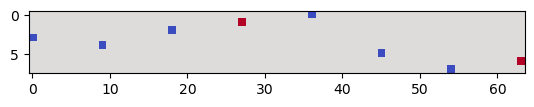

(200, 64, 8) (200, 64, 8)


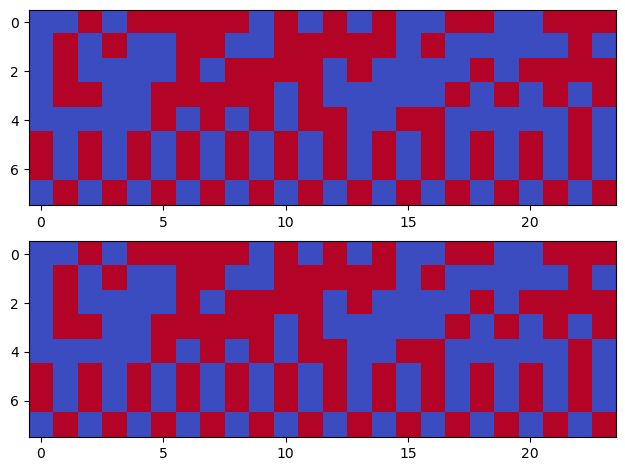

In [6]:
## Run models on test set to evaluate accuracy

test_accuracies = []
tested_models = 0
for model_id, model_path in enumerate(result_df['path']):
    
    print("Evaluating model id: {}/{}".format(model_id, len(result_df["path"])))
    
    if not os.path.isfile(model_path):
        test_accuracies.append(-1)
        continue
    
    if torch.cuda.is_available():
        device = "cuda"
    else:
        device = "cpu"
    lmodel = BinaryLinearVBTask.load_from_checkpoint(model_path, map_location=torch.device(device))
    lmodel.eval()
    
    ## linearized model
    
    lmodel.test_dataset.set_horizon(200)
    test_dataset = lmodel.test_dataset.__iter__()
    
    accuracies = []
    for i in range(10):
        sample = next(test_dataset)
        x, y = sample
        x = x.to(device)
        y = y.to(device)
        
        lmodel.model.initialize_hidden(batch_size=BATCH_SIZE, device=device)
        y_hat = lmodel.model.forward(x)
        
        # y_hat = torch.stack(y_hat, dim=0).squeeze()
        y_hat = y_hat.reshape((-1, lmodel.model.input_dim))
        y_hat = y_hat.reshape((-1, BATCH_SIZE, lmodel.model.input_dim))
        y_hat = y_hat[lmodel.seq_length:, :, :]
        
        y = y[lmodel.seq_length:, :, :]
        
        # convert predictions
        y_hat_predictions = y_hat.detach().clone()
        y_hat_predictions[y_hat_predictions >= 0] = 1
        y_hat_predictions[y_hat_predictions < 0] = -1
        y_hat_predictions = y_hat_predictions.long()

        y = y.cpu().detach().numpy()
        y_hat_predictions = y_hat_predictions.cpu().detach().numpy()

        accuracy = (y_hat_predictions.astype(np.int_) == y.astype(np.int_)).astype(np.int_)
        accuracies.append(np.mean(accuracy))
        
    
    test_accuracies.append(np.mean(accuracies))
    
    if np.mean(accuracies) > 0.999 and lmodel.model.hidden_dim >= 0:
        
        print(np.mean(accuracies))
        print(result_df.loc[model_id])
        emt_lmodel = LinearModel(lmodel.input_dim, lmodel.model.hidden_dim)
        emt_lmodel.parse_simple_rnn(lmodel.model)
        Psi, Psi_star = emt_lmodel.get_variable_basis(lmodel.seq_length, 
                                            alpha=1, f_operator=lmodel.train_dataset.f_operator)
        
        ax = plt.subplot()
        im = ax.imshow(Psi_star @ emt_lmodel.W_hh @ Psi, cmap="coolwarm", vmin=-1, vmax=1, alpha=1)

        # create an Axes on the right side of ax. The width of cax will be 5%
        # of ax and the padding between cax and ax will be fixed at 0.05 inch.
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)

        plt.colorbar(im, cax=cax)
        
        for i in range(lmodel.input_dim):
            ax.axhline(y=((i+1)*lmodel.seq_length)-.9, color='w', linestyle='-', lw=0.7)

        for j in range(lmodel.input_dim):
            ax.axvline(x=((j+1)*lmodel.seq_length)-.5, color='w', linestyle='-', lw=0.7)

        ax.axhline(y=lmodel.input_dim*lmodel.seq_length-0.5, color='k', linestyle='-')
        ax.axvline(x=lmodel.input_dim*lmodel.seq_length-0.5, color='k', linestyle='-')

        ax.set_xticks(np.arange(lmodel.input_dim//2, lmodel.input_dim*lmodel.seq_length, lmodel.input_dim), range(1, lmodel.seq_length+1))
        ax.set_yticks(np.arange(lmodel.input_dim//2, lmodel.input_dim*lmodel.seq_length, lmodel.input_dim), range(1, lmodel.seq_length+1))
        ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

        plt.show()
        
        plt.imshow(lmodel.train_dataset.f_operator.T, cmap="coolwarm", vmin=-1, vmax=1)
        plt.show()
        
        print(y_hat_predictions.shape, y.shape)
        plt.subplot(211)
        plt.imshow(y_hat_predictions[:24, 0, :].T, cmap="coolwarm")
        
        plt.subplot(212)
        plt.imshow(y[:24, 0, :].T, cmap="coolwarm")
        plt.tight_layout()
        plt.show()
        
        tested_models += 1
        if tested_models > 5:
            break

In [8]:
y[:2]

array([[[-1., -1., -1., ...,  1.,  1., -1.],
        [-1.,  1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        ...,
        [-1., -1.,  1., ..., -1.,  1.,  1.],
        [-1.,  1.,  1., ...,  1., -1., -1.],
        [ 1.,  1.,  1., ...,  1., -1.,  1.]],

       [[-1.,  1.,  1., ..., -1., -1.,  1.],
        [-1.,  1.,  1., ..., -1., -1.,  1.],
        [ 1., -1.,  1., ..., -1., -1.,  1.],
        ...,
        [ 1.,  1.,  1., ...,  1.,  1., -1.],
        [-1., -1.,  1., ..., -1., -1., -1.],
        [-1., -1.,  1., ..., -1.,  1., -1.]]], dtype=float32)

## plot matplotlib animation of variable binding

In [9]:
print(lmodel.model.all_hidden.shape)

torch.Size([208, 64, 150])


In [10]:
np.allclose(Psi_star @ Psi, np.eye(Psi_star.shape[0]))

False

In [11]:
# custom evolution
h_history = np.zeros((x.shape[0], lmodel.seq_length*lmodel.input_dim))
for i in range(lmodel.seq_length):
    if i > 0:
        h_history[i, (lmodel.seq_length-i-1)*lmodel.input_dim:-lmodel.input_dim] = h_history[i-1, 
                                                                                             (lmodel.seq_length-i)*lmodel.input_dim:]
    
    h_history[i, -lmodel.input_dim:] = x[i, 0, :].cpu().data.numpy().squeeze()
    

## construct phi
phi = np.eye(lmodel.seq_length*lmodel.input_dim)
phi = np.roll(phi, lmodel.input_dim)

phi[:, :lmodel.input_dim] = 0
phi[-lmodel.input_dim:, :] = lmodel.train_dataset.f_operator.cpu().data.numpy().T

for i in range(lmodel.seq_length, 200):
    h_history[i] = h_history[i-1:i, :] @ phi.T

In [12]:
h_history.shape

(208, 64)

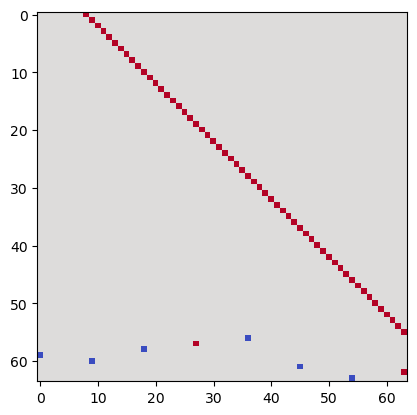

In [13]:
plt.imshow(phi, cmap="coolwarm", vmin=-1, vmax=1)

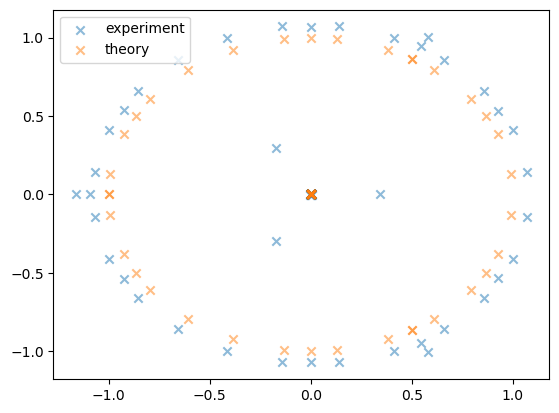

In [14]:
eig_vals, eig_vecs = np.linalg.eig(emt_lmodel.W_hh)
plt.scatter(eig_vals.real, eig_vals.imag, label="experiment", marker="x", alpha=0.5)

eig_vals, eig_vecs = np.linalg.eig(phi)
plt.scatter(eig_vals.real, eig_vals.imag, label="theory", marker="x", alpha=0.5)

plt.legend()
plt.show()

In [36]:
print(np.degrees(spectral_comparison(emt_lmodel.W_hh, phi)))

0.04149993407029486


In [133]:
lmodel.model.all_hidden[0][0].shape

torch.Size([150])

In [134]:
output_history = np.zeros((h_history.shape[0], lmodel.input_dim))
output_history[lmodel.seq_length:] = y_hat[:, 0, :].squeeze().cpu().data.numpy().copy()

input_history = x[:, 0, :].squeeze().cpu().data.numpy().copy()

In [135]:
lmodel.model.all_hidden[0][0].shape

torch.Size([150])

In [144]:
Psi_star.shape

(64, 150)

In [149]:
np.linalg.norm(Psi_star, axis=1).shape

(64,)

(24, 64) (64, 64)


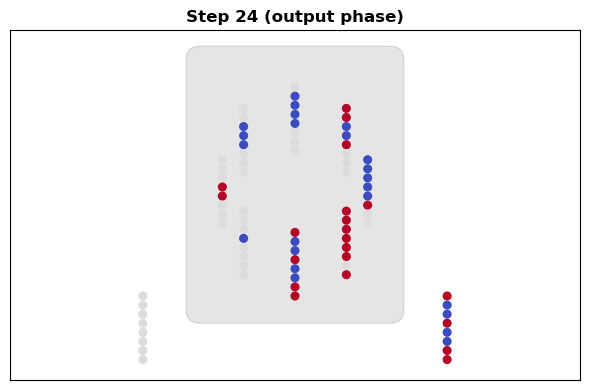

In [150]:
## ideal
binv_theoretical = np.eye(lmodel.seq_length*lmodel.input_dim)
binv_theoretical[np.linalg.norm(Psi_star, axis=1)<=1e-10] = 0

emt_lmodel.plot_evolution_basis(input_history, # u_history
                               h_history[:3*lmodel.seq_length],  # h_history
                               output_history,  # y_history
                               binv_theoretical,  # Psi_star
                               # np.eye(lmodel.input_dim*lmodel.seq_length),
                               None,  # Phi
                               lmodel.input_dim,  # task_dimension
                               lmodel.seq_length,  # s
                               "animation_theoretical.gif")

(24, 150) (64, 150)


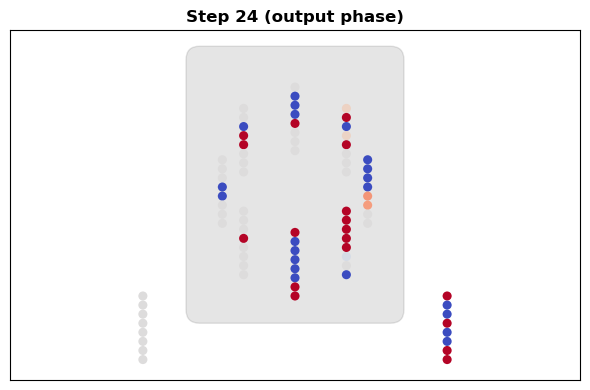

In [137]:
## in memory basis
emt_lmodel.plot_evolution_basis(input_history, # u_history
                               lmodel.model.all_hidden[:3*lmodel.seq_length, 0, :].cpu().data.numpy(),  # h_history
                               output_history,  # y_history
                               Psi_star,  # Psi_star
                               # np.eye(lmodel.input_dim*lmodel.seq_length),
                               None,  # Phi
                               lmodel.input_dim,  # task_dimension
                               lmodel.seq_length,  # s
                               "animation.gif")

In [16]:
result_df["test_accuracy"] = test_accuracies

ValueError: Length of values (6) does not match length of index (151)

In [ ]:
result_df[result_df["test_accuracy"] > 0.99]

In [65]:
result_df.to_csv(os.path.join(EXPERIMENT_PATH, "result_df.csv"), index=False)

## Load a previously saved result_dict

In [47]:
result_df = pd.read_csv(os.path.join(EXPERIMENT_PATH, "result_df.csv"))

In [48]:
result_df[:5]

,batch_size,curriculum,curriculum_threshold,hidden_dim,input_dim,l2_penalty,learning_rate,seed,seq_length,task_id,path,test_accuracy
0,64,True,0.98,150,8,0.000,0.001,1,8,"(255, 0, 0)",/home/akaruvally_umass_edu/pi_hava_umass_edu/a...,0.999530
1,64,True,0.90,120,8,0.001,0.001,1,8,"(255, 0, 0)",/home/akaruvally_umass_edu/pi_hava_umass_edu/a...,0.851268
2,64,True,0.98,150,8,0.100,0.001,2,8,"(255, 0, 0)",/home/akaruvally_umass_edu/pi_hava_umass_edu/a...,0.498031
3,64,True,0.90,150,8,10.000,0.001,2,8,"(255, 0, 0)",/home/akaruvally_umass_edu/pi_hava_umass_edu/a...,0.498632
4,64,True,0.98,150,8,10.000,0.001,2,8,"(255, 0, 0)",/home/akaruvally_umass_edu/pi_hava_umass_edu/a...,0.501400


In [49]:
all_tasks = result_df["task_id"].unique()
all_hidden = result_df["hidden_dim"].unique()
all_l2 = result_df["l2_penalty"].unique()

In [50]:
all_combinations = list(itertools.product(*[all_tasks, all_hidden, all_l2]))

In [51]:
combination_result = {}

for combination in all_combinations:
    print(combination)
    temp_df = result_df.loc[(result_df["task_id"] == combination[0]) & (result_df["hidden_dim"] == combination[1]) & (result_df["l2_penalty"] == combination[2])]
    
    # print(temp_df.groupby(['seed'])['test_accuracy'].max())
    combination_result[combination] = np.mean(temp_df.groupby(['seed'])['test_accuracy'].max())
    print(np.mean(temp_df.groupby(['seed'])['test_accuracy'].max()))
    #     all_seeds = temp_df["seed"].unique()
    
#     for seed in all_seeds:
#         temp_df = 
#     print(temp_df["test_accuracy"])

('(255, 0, 0)', 150, 0.0)
0.99957275390625
('(255, 0, 0)', 150, 0.001)
0.93810693359375
('(255, 0, 0)', 150, 0.1)
0.50073779296875
('(255, 0, 0)', 150, 10.0)
0.5027231445312501
('(255, 0, 0)', 120, 0.0)
0.99996533203125
('(255, 0, 0)', 120, 0.001)
0.9223974609374999
('(255, 0, 0)', 120, 0.1)
0.50105419921875
('(255, 0, 0)', 120, 10.0)
0.49938623046875
('(255, 0, 0)', 80, 0.0)
1.0
('(255, 0, 0)', 80, 0.001)
0.91595263671875
('(255, 0, 0)', 80, 0.1)
0.50274462890625
('(255, 0, 0)', 80, 10.0)
0.50102294921875
('(255, 0, 0)', 64, 0.0)
0.98548583984375
('(255, 0, 0)', 64, 0.001)
0.94888427734375
('(255, 0, 0)', 64, 0.1)
0.50123291015625
('(255, 0, 0)', 64, 10.0)
0.5029204101562499
('(9241421688590303745, 0, 0)', 150, 0.0)
0.9521215820312501
('(9241421688590303745, 0, 0)', 150, 0.001)
0.9463144531250001
('(9241421688590303745, 0, 0)', 150, 0.1)
0.50126416015625
('(9241421688590303745, 0, 0)', 150, 10.0)
0.50291748046875
('(9241421688590303745, 0, 0)', 120, 0.0)
0.99974609375
('(9241421688590

In [52]:
for i, task_id in enumerate(all_tasks):
    print("=========Task {} ============".format(i+1))
    # print("hidden_dim | l2_reg", end="")
    for l2 in [0.0, 0.001, 0.1, 10.0]:
        print("\t {}".format(l2), end=" ")
    print("\n........................................")
    
    print("")
    for hidden_dim in [64, 80, 120, 150]:
        print("{} \t".format(hidden_dim), end=" |")
        
        for l2 in [0.0, 0.001, 0.1, 10.0]:
            print("{:.2f}".format(combination_result[(task_id, hidden_dim, l2)]), end="\t")
        
        print("")

=========Task 1 ============
	 0.0 	 0.001 	 0.1 	 10.0 
........................................

64 	 |0.99	0.95	0.50	0.50	
80 	 |1.00	0.92	0.50	0.50	
120 	 |1.00	0.92	0.50	0.50	
150 	 |1.00	0.94	0.50	0.50	
=========Task 2 ============
	 0.0 	 0.001 	 0.1 	 10.0 
........................................

64 	 |0.95	0.90	0.50	0.50	
80 	 |0.97	0.91	0.50	0.50	
120 	 |1.00	0.94	0.49	0.50	
150 	 |0.95	0.95	0.50	0.50	
=========Task 3 ============
	 0.0 	 0.001 	 0.1 	 10.0 
........................................

64 	 |1.00	0.81	0.50	0.50	
80 	 |1.00	0.84	0.50	0.50	
120 	 |1.00	0.97	0.51	0.50	
150 	 |0.87	0.91	0.50	0.50	
